In [1]:
import pandas as pd
import collections
import nltk
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

C:\Users\hanch\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# to do, format this better and focus analysis only on these conferences, update the df in the beginning
venue_map = [('CHI Extended Abstracts', 'CHI'),
 ('CHI', 'CHI'),
 ('CSCW', 'CSCW'),
 ('UbiComp', 'UBI'),
 ('UIST', 'UIST'),
 ('Computer Supported Cooperative Work (CSCW)', 'CSCW'),
 ('UbiComp Adjunct', 'UBI'),
 ('CSCW Companion', 'CSCW'),
 ('CHI Conference Companion', 'CHI'),
 ('UbiComp/ISWC Adjunct', 'UBI'),
 ("CHI EA '04", 'CHI'),
 ('CHI 95 Conference Companion', 'CHI'),
 ('CHI Conference Summary', 'CHI'),
 ("UbiComp '11", 'UBI'),
 ('CHI 2014', 'CHI'),
 ("CHI '92", 'CHI'),
 ("CHI '99", 'CHI'),
 ("CHI '03", 'CHI'),
 ("CSCW '13", 'CSCW'),
 ("CHI '95", 'CHI'),
 ("CHI '89", 'CHI'),
 ("UbiComp '10 Adjunct", 'UBI'),
 ("CHI '90", 'CHI'),
 ("CHI '94", 'CHI'),
 ("CSCW '06", 'CSCW'),
 ("CSCW '10", 'CSCW'),
 ("CHI '83", 'CHI'),
 ("UIST'14 Adjunct", 'UIST'),
 ("CHI '87", 'CHI'),
 ("CHI '86", 'CHI'),
 ("CSCW '96", 'CSCW'),
 ("UIST '13 Adjunct", 'UIST'),
 ("CSCW '00", 'CSCW'),
 ("CSCW '98", 'CSCW'),
 ("UIST '10", 'UIST'),
 ("CHI '88", 'CHI'),
 ("CSCW '02", 'CSCW'),
 ("UIST Adjunct Proceedings '12", 'UIST'),
 ("CHI '85", 'CHI'),
 ("CSCW '94", 'CSCW'),
 ("CSCW '92", 'CSCW'),
 ("UIST '04", 'UIST'),
 ("UIST '11 Adjunct", 'UIST'),
 ("UIST '08", 'UIST'),
 ("UIST '09", 'UIST'),
 ("CHI '82", 'CHI'),
 ("UIST '97", 'UIST'),
 ("CSCW '86", 'CSCW'),
 ("UIST '95", 'UIST'),
 ("UIST '98", 'UIST'),
 ("UIST '94", 'UIST'),
 ("CSCW '88", 'CSCW'),
 ("UIST '01", 'UIST'),
 ("UIST '96", 'UIST'),
 ("UIST '00", 'UIST'),
 ("UIST '93", 'UIST'),
 ("CSCW '90", 'CSCW'),
 ("UIST '99", 'UIST'),
 ("UIST '02", 'UIST'),
 ("UIST '03", 'UIST'),
 ('CHI 2007', 'CHI'),
 ("UIST '91", 'UIST'),
 ("UIST '89", 'UIST'),
 ("UIST '90", 'UIST'),
 ('CHI 2010', 'CHI'),
 ("UIST '92", 'UIST'),
 ('CHI 2008', 'CHI'),
 ('UBICOMP 2015', 'UBI'),
 ('CHI 2011', 'CHI'),
 ('CHI 2009', 'CHI'),
 ('Ubicomp 2009', 'UBI'),
 ('UbiComp 2016', 'UBI'),
 ('UbiComp 2011', 'UBI'),
 ('CHI 1994', 'CHI'),
 ('CHI 2012', 'CHI'),
 ('CHI 2002', 'CHI'),
 ('CHI 2013', 'CHI'),
 ("CHI '81", 'CHI'),
 ('CHI 2017', 'CHI'),
 ('UbiComp 2014', 'UBI'),
 ('CHI 2015', 'CHI'),
 ('CHI 2006', 'CHI'),
 ('UbiComp 2013', 'UBI'),
 ('UbiComp 2008', 'UBI'),
 ('CHI 2003', 'CHI'),
 ('Ubicomp 2010', 'UBI'),
 ('CHI 2001', 'CHI'),
 ('CHI 2018', 'CHI'),
 ('CHI 1995', 'CHI'),
 ("CHI '02", 'CHI'),
 ('CSCW 2017', 'CSCW'),
 ('Computer Supported Cooperative Work and Social Computing', 'CSCW'),
 ('CHI 1997', 'CHI'),
 ('CHI 2016', 'CHI'),
 ('CHI 2005', 'CHI'),
 ('Proc. ACM Hum. Comput. Interact.', 'CSCW'),
 ('Comput. Support. Cooperative Work.', 'CSCW'),
 ('UBICOMP 2012', 'UBI'),
 ('CHI 1998', 'CHI'),
 ('CHI 2004', 'CHI'),
 ('CSCW 2008', 'CSCW'),
 ('CSCW 2016', 'CSCW'),
 ('UIST 2013', 'UIST'),
 ('UIST 2016', 'UIST'),
 ('UIST 2014', 'UIST'),
 ('UIST 2011', 'UIST'),
 ('CHI 1993', 'CHI'),
 ('CHI 2000', 'CHI'),
 ('CSCW 2010', 'CSCW'),
 ('CSCW 2012', 'CSCW'),
 ('CSCW 2014', 'CSCW'),
 ('CSCW 2013', 'CSCW'),
 ('CSCW 2015', 'CSCW'),
 ('Proc. ACM Interact. Mob. Wearable Ubiquitous Technol.', 'UBI'),
 ('UbiComp 2017', 'UBI'),
 ('UIST 2007', 'UIST'),
 ('UIST 2008', 'UIST'),
 ('CHI 1999', 'CHI')]

venue_map_dict = {}
for unit in venue_map:
    venue_map_dict[unit[0]] = unit[1]

In [3]:
# data that joins patent paper citation
df = pd.read_csv('final_all_HCI_info.tsv',sep=',')

In [4]:
df.columns

Index(['mag_id', 'paperid', 'externalIds', 'url', 'title', 'abstract', 'venue',
       'year', 'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal', 'authors', 'patents', 'aff_affiliations',
       'aff_authorids', 'aff_paperid'],
      dtype='object')

In [5]:
df['authors'][0]

"{'offset': 0, 'data': [{'authorId': '144789947', 'url': 'https://www.semanticscholar.org/author/144789947', 'name': 'Roberto Pereira', 'affiliations': [], 'homepage': None, 'paperCount': 16, 'citationCount': 87}, {'authorId': '2144069', 'url': 'https://www.semanticscholar.org/author/2144069', 'name': 'I. Gasparini', 'affiliations': [], 'homepage': None, 'paperCount': 104, 'citationCount': 268}, {'authorId': '2061836336', 'url': 'https://www.semanticscholar.org/author/2061836336', 'name': 'Luciana Salgado', 'affiliations': [], 'homepage': None, 'paperCount': 10, 'citationCount': 31}]}"

In [6]:
df['venue'] = df['venue'].map(venue_map_dict)

In [7]:
# filter the dataframe so it limits to real CHI, CSCW, UBICOMP and UIST
df = df[df['venue'].isna() == False].reset_index()

In [141]:
df[['mag_id','venue']].to_csv('filtered_HCI_papers.csv')

In [8]:
df['IsPatentCited'] = 1 - df['patents'].isna()

In [9]:
######### 
df_patent_cited = df[df['patents'].isna() == False]
df_patent_notcited = df[df['patents'].isna() == False]
print ('aggregate percentage of papers recognized by patents')
print (1-(len(df[df['patents'].isna() == True])/len(df)))

aggregate percentage of papers recognized by patents
0.1591912936569373


In [151]:
def get_affiliation(l):
    regex = '\'(.*?)\''
    return re.findall(regex, l)

def get_affiliation_last(l):
    try:
        #if l[-1].split(',')[0] == 'Department of Computer Science' or l[-1].split(',')[0] == 'Computer Science Department' or l[-1].split(',')[0] =='Department of Psychology':
        if 'Department' in l[-1].split(',')[0].split(' ') or 'Dept.' in l[-1].split(',')[0].split(' ') or 'School' in l[-1].split(',')[0].split(' '):    
            return l[-1].split(',')[1].strip()
        else:
            if l[-1].split(',')[0] == 's University':
                return "Queen's University"
            if l[-1].split(',')[0] == 'MIT Media Laboratory' or l[-1].split(',')[0] == 'MIT Media Lab' or l[-1].split(',')[0] == 'MIT' or l[-1].split(',')[0] == 'MIT CSAIL':
                return 'Massachusetts Institute of Technology'
            if l[-1].split(',')[0] == 'Xerox PARC' or l[-1].split(',')[0] == 'Palo Alto Research Center':
                return 'Xerox Palo Alto Research Center'
            if l[-1].split(',')[0] == 'Microsoft Research' or l[-1].split(',')[0] == 'Microsoft Corporation':
                return 'Microsoft'
            if l[-1].split(',')[0] == 'IBM Research' or l[-1].split(',')[0] == 'IBM Almaden Research Center':
                return 'IBM'
            if l[-1].split(',')[0] == 'Graphics':
                return 'Georgia Institute of Technology'
            if l[-1].split(',')[0] == 'Bellcore':
                return 'Bell Communications Research'
            if l[-1].split(',')[0] == 'Korea Advanced Institute of Science and Technology':
                return 'KAIST'
            if l[-1].split(',')[0] == 'Indiana University Bloomington':
                return 'Indiana University'
            if l[-1].split(',')[0] == 'IBM T.J. Watson Research Center':
                return 'IBM'
            if l[-1].split(',')[0] == 'University of Illinois at Urbana-Champaign' or l[-1].split(',')[0] == 'University of Illinois at Chicago':
                return 'University of Illinois'
            if l[-1].split(',')[0] == 'Google Inc.':
                return 'Google'
            if l[-1].split(',')[0] == 'Human Computer Interaction Institute':
                return 'Carnegie Mellon University'
            else:
                return l[-1].split(',')[0].strip()
    except:
        return ''

In [11]:
df['aff_affiliations'] = df['aff_affiliations'].apply(get_affiliation)

In [152]:
df['aff_affiliations_last_author'] = df['aff_affiliations'].apply(get_affiliation_last)

In [145]:
list(df[df['aff_affiliations_last_author'] == 'Human Computer Interaction Institute']['aff_affiliations'])

[]

In [146]:
collections.Counter(df['aff_affiliations_last_author']).most_common()

[('Carnegie Mellon University', 706),
 ('University of California', 541),
 ('Massachusetts Institute of Technology', 534),
 ('Microsoft', 507),
 ('University of Washington', 490),
 ('Georgia Institute of Technology', 396),
 ('University of Michigan', 307),
 ('Stanford University', 281),
 ('Cornell University', 239),
 ('University of Maryland', 229),
 ('IBM', 216),
 ('KAIST', 191),
 ('Indiana University', 183),
 ('University of Toronto', 178),
 ('Xerox Palo Alto Research Center', 175),
 ('University College London', 151),
 ('Simon Fraser University', 143),
 ('Google', 132),
 ('', 132),
 ('University of Glasgow', 130),
 ('Northwestern University', 128),
 ('University of Illinois', 126),
 ('Newcastle University', 119),
 ('Lancaster University', 118),
 ('University of Calgary', 110),
 ('Eindhoven University of Technology', 100),
 ('The University of Tokyo', 99),
 ('University of Waterloo', 98),
 ('University of British Columbia', 96),
 ('Keio University', 92),
 ('University of Minnesota', 

In [96]:
# first select top institutes in all periods
def get_institute_paper_dist(df, top_count = 20):
    df = df[df['aff_affiliations_last_author']!='']
    org_paper_num = collections.Counter(df['aff_affiliations_last_author'])
    Org_top = [i[0] for i in org_paper_num.most_common(top_count)]
    Org_top_total_paper_count = [i[0] for i in org_paper_num.most_common(top_count)]

    # get patent cited paper counts for top organizations
    df_temp = df[df['IsPatentCited']==1]
    org_patent_cited_paper_num = collections.Counter(df_temp['aff_affiliations_last_author'])
    patent_cited_paper_num = [org_patent_cited_paper_num[k] for k in Org_top]

    # get patent cited paper counts for top organizations
    df_temp = df[df['IsPatentCited']==0]
    org_patent_notcited_paper_num = collections.Counter(df_temp['aff_affiliations_last_author'])
    patent_notcited_paper_num = [org_patent_notcited_paper_num[k] for k in Org_top]

    plt.barh(Org_top, patent_cited_paper_num, label = 'patent cited', color='#1D2F6F')
    plt.barh(Org_top, patent_notcited_paper_num, left=patent_cited_paper_num, label = 'Non patent cited', color='#8390FA')

    plt.xlabel("Number of papers")

    plt.gca().invert_yaxis()    
    plt.legend()

In [12]:
df['year_range'] = pd.cut(df.year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

In [44]:
df['year_range'].iloc[0]

Interval(2010.0, 2015.0, closed='right')

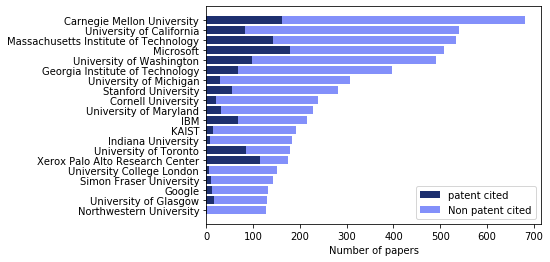

In [138]:
get_institute_paper_dist(df)

Text(0.5, 1.0, 'Number of HCI papers by institute, 1980-1990')

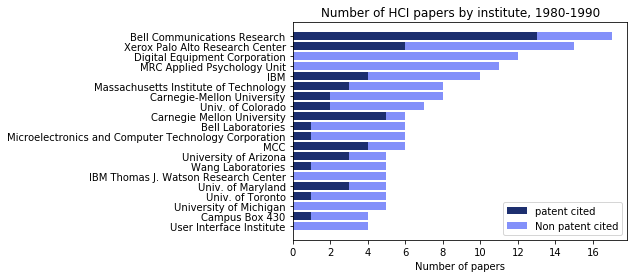

In [186]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(1980.0, 1990.0)])
plt.title('Number of HCI papers by institute, 1980-1990')

Text(0.5, 1.0, 'Number of HCI papers by institute, 1990-2000')

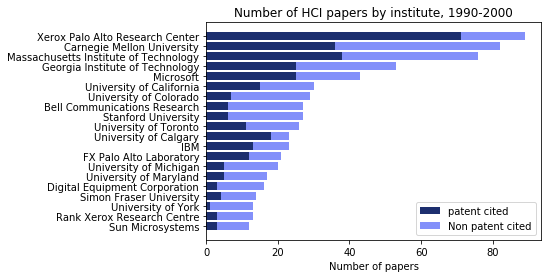

In [153]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(1990.0, 2000.0)])
plt.title('Number of HCI papers by institute, 1990-2000')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2000-2005')

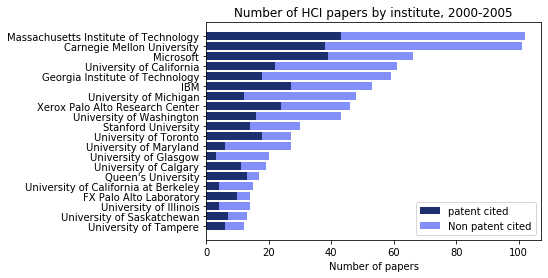

In [154]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2000.0, 2005.0)])
plt.title('Number of HCI papers by institute, 2000-2005')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2005-2010')

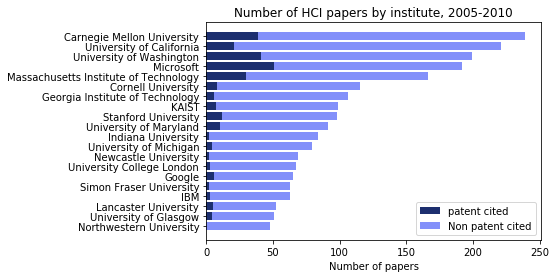

In [156]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2010.0, 2015.0)])
plt.title('Number of HCI papers by institute, 2005-2010')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2010-2015')

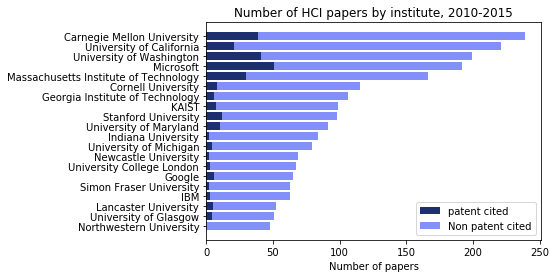

In [155]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2010.0, 2015.0)])
plt.title('Number of HCI papers by institute, 2010-2015')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2015-2020')

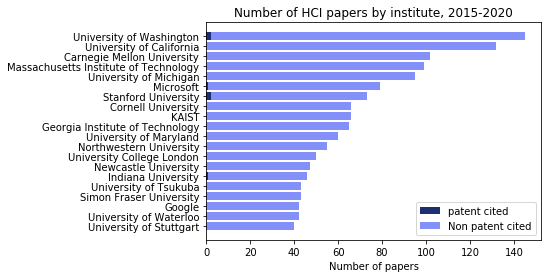

In [157]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2015.0, 2020.0)])
plt.title('Number of HCI papers by institute, 2015-2020')

In [ ]:
# for papers 

In [22]:
# institues with highest ratio of patent recognized papers
org_patent_cited_paper_rate = {}
for key in set(org_paper_num.keys()).intersection(set(org_patent_cited_paper_num.keys())):
    org_patent_cited_paper_rate[key] = org_patent_cited_paper_num[key]/org_paper_num[key]

In [23]:
df_institute = org_patent_cited_paper_rate

{'': 0.1518987341772152,
 'Institut National de Re her he en Informatique et en Automatique (INRIA)': 1.0,
 'Google': 0.1,
 'Artificial Intelligence Laboratory': 0.16666666666666666,
 'Department of Information Systems': 0.25,
 'Massachusetts Institute of Technology & Comenius University': 1.0,
 'MIT Media-Lab': 1.0,
 'Cavendish Laboratory': 1.0,
 'Open University': 0.3333333333333333,
 'palmOne': 0.3333333333333333,
 'Kochi University of Technology': 0.18181818181818182,
 'Microsoft Research Asia & Chinese Academy of Sciences': 1.0,
 'SAP AG': 0.25,
 'Technische Universiteit Eindhoven (TU/e)': 1.0,
 'Dept. of Math. and Comp. Science': 1.0,
 'Intuit Inc.': 0.5,
 'University of Ontario Institute of Technology': 0.09523809523809523,
 'Media Lab Asia': 1.0,
 'Hebrew University': 1.0,
 'Fujitsu Ltd.': 1.0,
 'Xerox Corporation': 0.2,
 'CSCW Research Centre|Computing Department|Lancaster University': 1.0,
 'Hochschule Bremen (University of Applied Sciences)': 1.0,
 'North Carolina State Univ

In [ ]:
# comparing those cited by patents and those that didn't
# citation count, affiliation
# paper and patent citation over time
# first author and last author paper count

(array([ 63.,  75.,  84., 157., 136., 161., 236., 507., 691., 760.]),
 array([1986. , 1989.3, 1992.6, 1995.9, 1999.2, 2002.5, 2005.8, 2009.1,
        2012.4, 2015.7, 2019. ]),
 <a list of 10 Patch objects>)

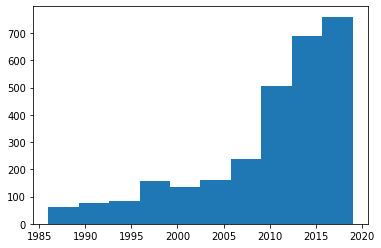

In [155]:
df_temp = df[df['venue'] == 'CSCW']
plt.hist(df_temp['year'],bins = 10)

Text(0.5, 1.0, 'academic impact of papers recognized in patents vs. those not recognized')

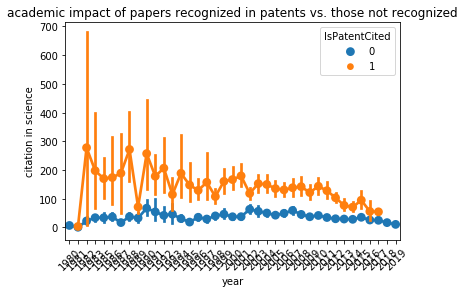

In [158]:


sns.pointplot(x = df['year'].astype('int'), y = 'citationCount', hue = 'IsPatentCited' , data = df)

plt.xticks(rotation=45)
plt.ylabel('citation in science')
plt.xlabel('year')
plt.title('academic impact of papers recognized in patents vs. those not recognized')

In [ ]:
# to do: top x% cited paper (hue) in each year (x) the percentage get recognized by patent (y)

In [175]:
df_temp.groupby(['year'])

In [184]:
#df.groupby(['year'])['citationCount'].transform(lambda x: pd.qcut(x, 5,labels=['20%','40%','60%', '80%','100%']))
df_temp = df[df['year']>1990]
df_temp.groupby(['year'])['citationCount'].transform(lambda x:pd.qcut(x.rank(method='first'), 3, labels=range(1,4)))

0        3
1        2
2        2
3        3
4        1
        ..
21956    3
21957    2
21958    2
21959    3
21960    2
Name: citationCount, Length: 21399, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [ ]:
df.groupby('year').apply(lambda x: x[''])

In [ ]:
# top transferred institute over time (aggregated, and across time)

In [ ]:
# self citation over time

In [164]:
df

,index,mag_id,paperid,externalIds,url,title,abstract,venue,year,referenceCount,...,s2FieldsOfStudy,publicationTypes,publicationDate,journal,authors,patents,aff_affiliations,aff_authorids,aff_paperid,IsPatentCited
0,2,2244428935,f634a48ef7d4d92fb03b8cc97701a6820b86fd36,"{'ArXiv': '1510.08554', 'DBLP': 'conf/chi/Ruot...",https://www.semanticscholar.org/paper/f634a48e...,"""We're on the Same Page"": A Usability Study of...",Secure email is increasingly being touted as u...,CHI,2015.0,26.0,...,"[{'category': 'Computer Science', 'source': 'e...","['Book', 'JournalArticle', 'Conference', 'Revi...",2015-10-29,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '2554572',...",NaN,['Brigham Young University & Sandia National L...,"['1140008411', '1833198927', '2176732160', '22...",2244428935,0
1,5,2336371700,e5801ac7dc12bb855fe19e7e0e055a2955d269db,"{'MAG': '2336371700', 'DBLP': 'conf/chi/KleekM...",https://www.semanticscholar.org/paper/e5801ac7...,Computationally Mediated Pro-Social Deception,Deception is typically regarded as a morally i...,CHI,2016.0,66.0,...,"[{'category': 'Psychology', 'source': 'externa...","['Book', 'JournalArticle', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '2341082',...",NaN,"['University of Oxford, Oxford, Oxfordshire, U...","['1982381393', '1992824112', '2147622725', '26...",2336371700,0
2,9,2336913620,0da2cf9168d7ecaa7c77c756daa8641fc56a7b9d,"{'DBLP': 'conf/chi/Jamison-PowellB16', 'MAG': ...",https://www.semanticscholar.org/paper/0da2cf91...,"""PS. I Love You"": Understanding the Impact of ...",A number of digital platforms and services hav...,CHI,2016.0,76.0,...,"[{'category': 'Computer Science', 'source': 'e...","['JournalArticle', 'Book', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '140460355...",NaN,"['University of Lincoln, Lincoln, Lincolnshire...","['1955510120', '2108510301', '2127990789', '22...",2336913620,0
3,16,2337539845,b9200c781680c4fa411d7bd27e7137b6ede3d12e,"{'DBLP': 'conf/chi/Hamilton-Fletcher16', 'MAG'...",https://www.semanticscholar.org/paper/b9200c78...,"""I Always Wanted to See the Night Sky"": Blind ...",Sensory Substitution Devices (SSDs) convert vi...,CHI,2016.0,52.0,...,"[{'category': 'Computer Science', 'source': 'e...","['Book', 'JournalArticle', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '140462149...",NaN,"['University of Sussex, Brighton, United Kingd...","['1859118659', '1982436788', '2193021613', '24...",2337539845,0
4,17,2337630312,2cb44170c68d709e074bcacbc3dc478f641ede86,"{'MAG': '2337630312', 'DBLP': 'conf/chi/Gilard...",https://www.semanticscholar.org/paper/2cb44170...,Design Fiction Film-Making: A Pipeline for Com...,The use of films in early stages of the design...,CHI,2016.0,28.0,...,"[{'category': 'Computer Science', 'source': 'e...","['JournalArticle', 'Book']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '3318547',...",NaN,"['University of Sussex, Brighton, United Kingd...","['1859118659', '1982436788', '2107836554', '21...",2337630312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,26303,2094793656,f72a36ece13b8546b1164f64f17ebbac3f28c1ea,"{'MAG': '2094793656', 'DBLP': 'conf/uist/Klemm...",https://www.semanticscholar.org/paper/f72a36ec...,The designers' outpost: a tangible interface f...,"In our previous studies into web design, we fo...",UIST,2001.0,29.0,...,"[{'category': 'Computer Science', 'source': 'e...",['JournalArticle'],2001-11-11,{'pages': '1-10'},"{'offset': 0, 'data': [{'authorId': '21520403'...","{""7134756"": ""{\""patent_info\"": \""[{\\\""country...","['University of California at Berkeley, Berkel...","['2095943436', '2193817519', '2298605129', '26...",2094793656,1
21957,26304,2014853711,c8aaf654d76187c18014c

In [554]:
def stemming_sentence(sentence):
    try:
        words = nltk.tokenize.word_tokenize(sentence)
        words_s = ''
        for w in words:
            w_s = lemmatizer.lemmatize(w)
            #w_s = stemmer.stem(w)
            words_s+=w_s+' '
        return words_s
    except:
        return ''

In [555]:
df['title_processed'] = df['title'].apply(stemming_sentence)
df['abstract_processed'] = df['abstract'].apply(stemming_sentence)

In [556]:
df['paper_text'] = df['title_processed'] + ' ' + df['abstract_processed']

# textual difference between patent cited papers and non patent cited papers

In [420]:
def get_tfidf_top_features(documents,n_top=10):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(documents)
    importance = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
    return tfidf_feature_names[importance[:n_top]]

In [421]:
get_tfidf_top_features(df['title'])

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['design', 'user', 'interaction', 'using', 'social', 'based',
       'mobile', 'interface', 'designing', 'interactive'], dtype='<U22')

In [ ]:
## reference: https://buhrmann.github.io/tfidf-analysis.html

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [557]:
    # classifier: tfidf 
    key = 'paper_text'
    df_temp = df[[key, 'IsPatentCited']].dropna()
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


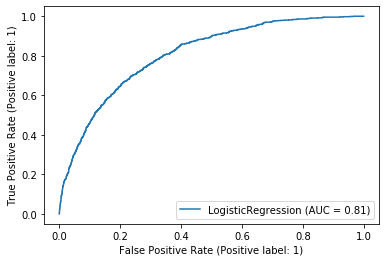

In [558]:
metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

In [559]:
features = vectorizer.get_feature_names()

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [560]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [561]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [562]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [563]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [564]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        if df.label == 1:
            ax.set_title("papers cited by patents", fontsize=16)
        else:
            ax.set_title("papers not cited by patents", fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [565]:
dfs = top_feats_by_class(X_train_tfidf, y_train, features)

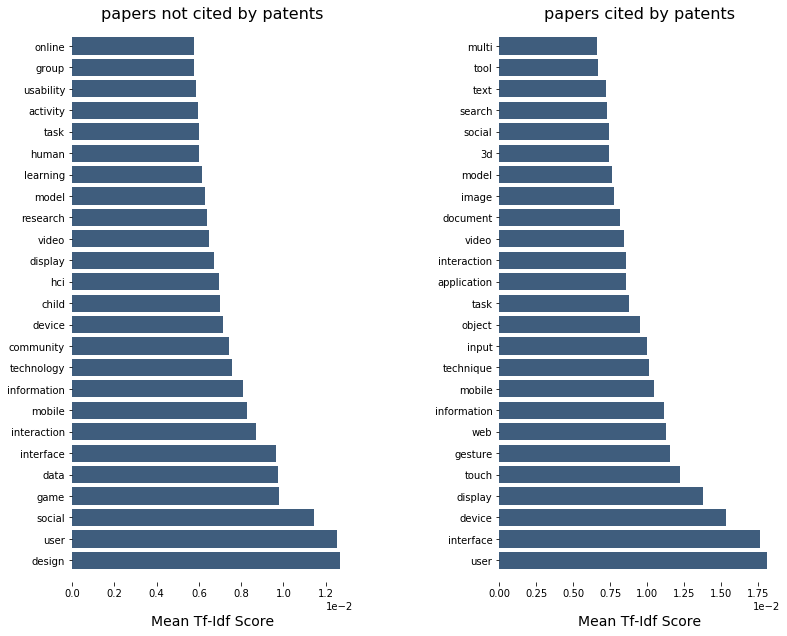

In [566]:
plot_tfidf_classfeats_h(dfs)

In [ ]:
# CHI

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


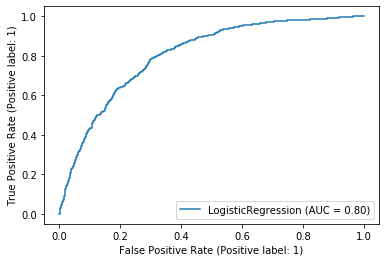

In [576]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'CHI'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


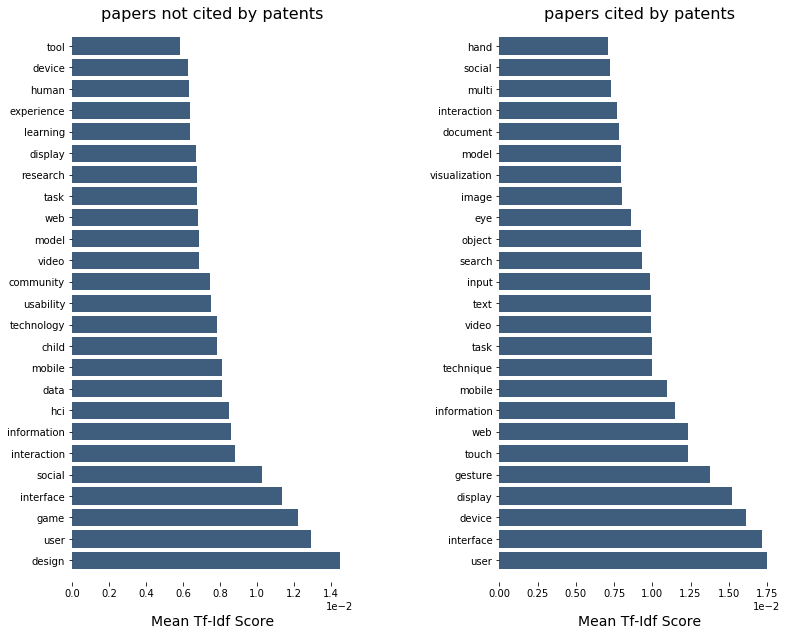

In [577]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# CSCW

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


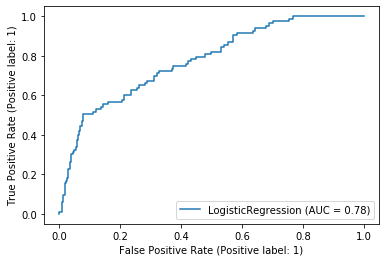

In [568]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'CSCW'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


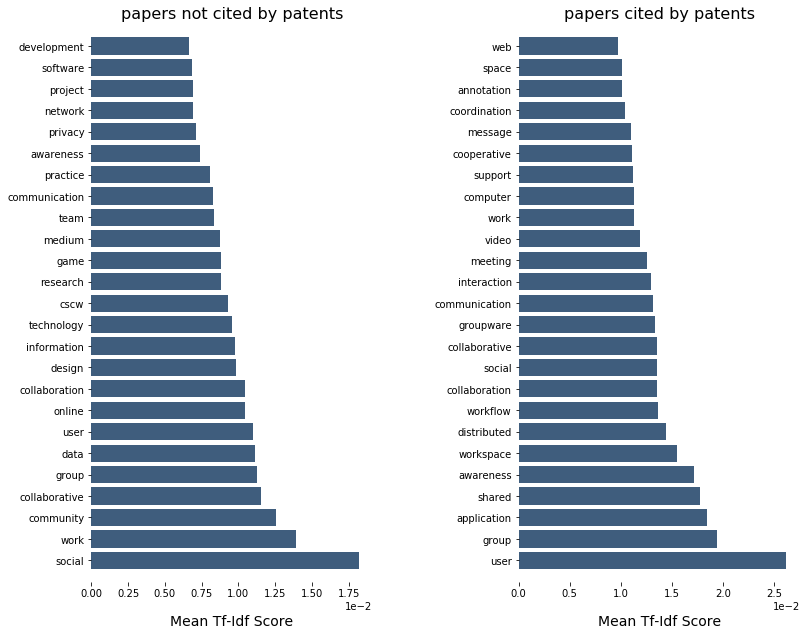

In [569]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# UIST

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


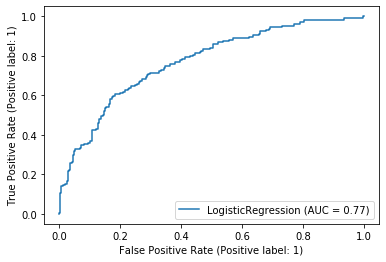

In [570]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'UIST'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


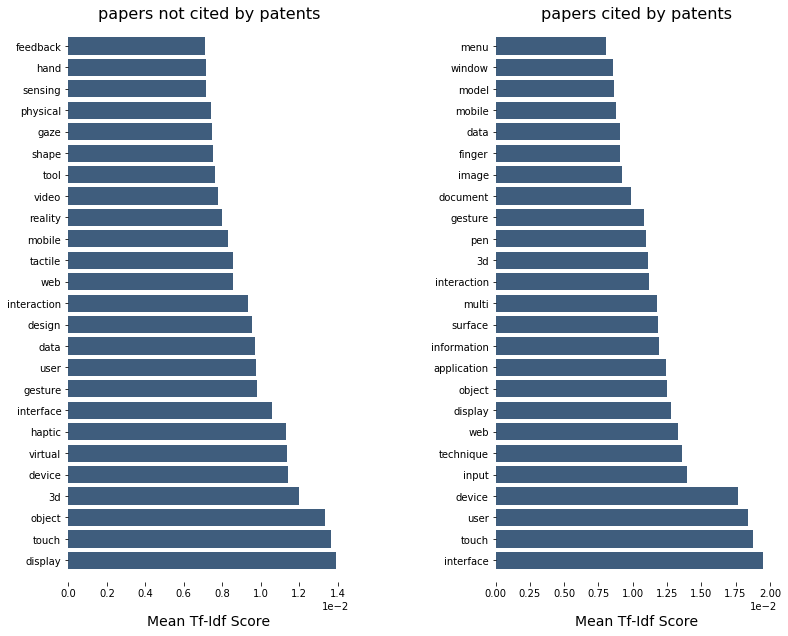

In [571]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# UBI

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


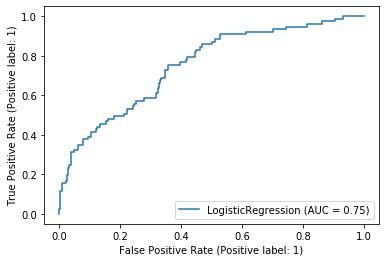

In [572]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'UBI'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


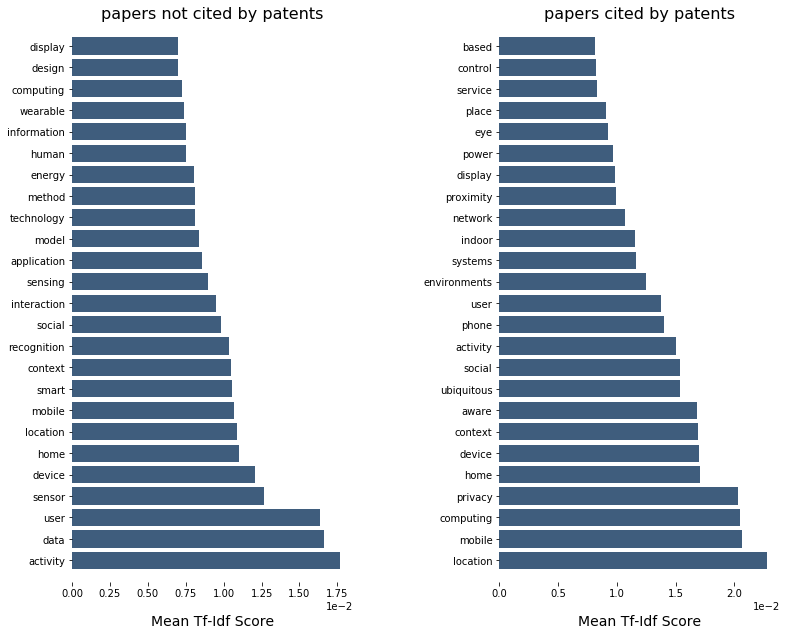

In [573]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [9]:
# word cloud
from wordcloud import WordCloud

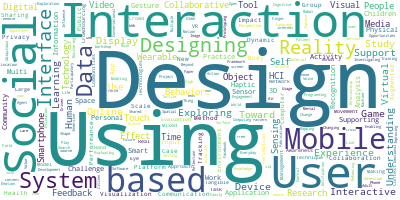

In [24]:
# title patent not cited
df_temp = df[df['year_range'] == pd.Interval(2015.0, 2020.0)]
long_string = ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(collocations=False,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


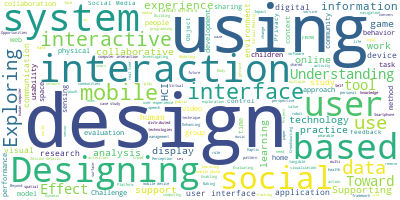

In [436]:
# title patent not cited
df_temp = df[df['IsPatentCited']==0]
long_string = ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# title patent cited
df_temp = df[df['IsPatentCited']==1]
long_string = ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

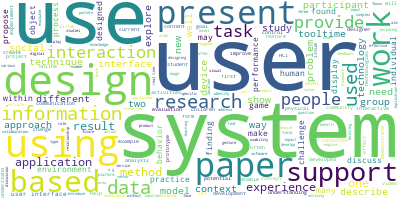

In [442]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==0]['abstract']).dropna()
long_string = ','.join(list(df_temp['abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

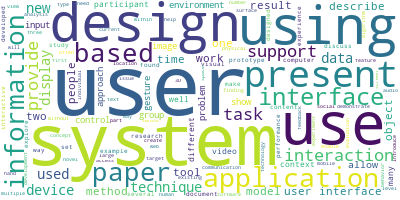

In [443]:
# abstract, patent cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==1]['abstract']).dropna()
long_string = ','.join(list(df_temp['abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

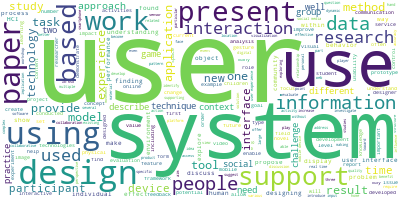

In [466]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==0][['abstract','title']]).dropna()
long_string = ','.join(list(df_temp['abstract'].values)) + ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [35]:
df_temp = df[df['venue']=='UIST']
df_temp = df_temp[df_temp['year']==1995]
sum(list(df_temp['IsPatentCited']))/len(df_temp['IsPatentCited'])

0.7878787878787878

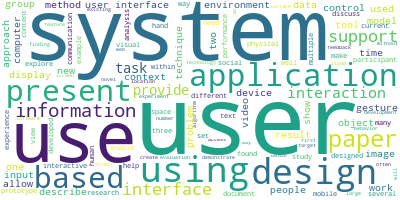

In [445]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==1][['abstract','title']]).dropna()
long_string = ','.join(list(df_temp['abstract'].values)) + ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [186]:
def load_json(string):
    try:
        return json.loads(string)
    except:
        return {float('NaN'):float('NaN')}

In [192]:
df['patents'].apply(load_json)

0                                               {nan: nan}
1                                               {nan: nan}
2                                               {nan: nan}
3                                               {nan: nan}
4                                               {nan: nan}
                               ...                        
21956    {'7134756': '{"patent_info": "[{\"country\":\"...
21957    {'8660934': '{"patent_info": "[{\"country\":\"...
21958    {'8671096': '{"patent_info": "[{\"country\":\"...
21959                                           {nan: nan}
21960    {'8135602': '{"patent_info": "[{\"country\":\"...
Name: patents, Length: 21961, dtype: object

In [188]:
df1 = (pd.DataFrame(load_json(df['patents'].values))
         .stack()
         .reset_index(level=1)
         .rename(columns={0:'val','level_1':'key'}))

ValueError: If using all scalar values, you must pass an index

In [ ]:
# what are those highly cited papers in academia but didn't appear in patent
# check percentile plot, e.g. top 10% paper how much enter in patents
# specific paper names
# time lag

In [ ]:
# check the extent of self cite

In [175]:
patent_num = []
for i in range(21961):
    try:
        patent_num.append(len(json.loads(df["patents"][i]).keys()))
    except:
        patent_num.append(0)

In [177]:
sum(patent_num)

39729

In [173]:
json.loads(df["patents"][21958]).keys()

dict_keys(['8671096', '8996984', '9298855'])

In [196]:
json.loads(json.loads(df["patents"][21958])['9298855'])

{'patent_info': '[{"country":"US","date":"2016-03-29","abstract":"Improved visual context management techniques are disclosed. By way of example, a technique for updating an existing visual display to incorporate new information comprises obtaining new information requested by a subsequent user query, and dynamically deriving one or more visual transformations for updating at least a portion of the existing display to incorporate the new information, wherein the transformation derivation is modeled as an optimization operation which attempts to balance visual context management constraints and to achieve a desired presentation of intended information.","title":"Optimization-based visual context management","kind":"B2","num_claims":27,"withdrawn":0,"assignee_id":"8fb58dbc-6e3c-4f3e-9b9b-69f3af0bc714","assignee_name_first":null,"assignee_name_last":null,"organization":"INTERNATIONAL BUSINESS MACHINES CORPORATION"}]',
 'inventors': '[{"inventor_id":"fl:mi_ln:zhou-134","inventor_name_first

In [75]:
json.loads("""{"7134756": {"patent_info": [{"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}], "inventors": [{"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}]}}""")

{'7134756': {'patent_info': [{'country': 'US',
    'date': '2006-11-14',
    'abstract': 'A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.',
    'title': 'Selectable projector and imaging modes of display table',
    

In [70]:
df_patent_cited['patents'][21]

"{'9747096': {'patent_info': [{'country': 'US', 'date': '2017-08-29', 'abstract': 'The Remote Embedded Device Update Platform Apparatuses, Methods and Systems (“REDUP”) transforms telemetry inputs via REDUP components into remote embedded updates outputs. The REDUP may include a memory and processor with instructions to: obtain a remote embedded device connection request message from a remote embedded device and analyze the message to determine a version of embedded instructions on the remote embedded device. With that, the REDUP may determine if other remote embedded devices similar to the remote embedded device have provided request messages by searching a remote embedded device connection request message database. This allows the REDUP to determine if a potential issue requiring updates on the remote embedded device exists. With that, the REDUP may determine and provide an update for the remote embedded device.', 'title': 'Remote embedded device update platform apparatuses, methods 